In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [2]:
# Read in data
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
print(df["koi_disposition"].unique())

['CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE']


# Select features (columns)

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
# Search for top 10 features according to feature importances
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.13441581, 0.18517096, 0.13985787, 0.04078183, 0.01461298,
       0.02004218, 0.01395656, 0.01021666, 0.02063014, 0.0241345 ,
       0.01064932, 0.00988796, 0.00971035, 0.01743314, 0.03181558,
       0.02289108, 0.01575082, 0.01162283, 0.00914697, 0.01242363,
       0.00912203, 0.00861679, 0.01418148, 0.00731637, 0.00955461,
       0.00776208, 0.02022058, 0.00772108, 0.00965977, 0.0262556 ,
       0.03427061, 0.01296114, 0.00826061, 0.01339783, 0.00765914,
       0.01053788, 0.00853376, 0.00900482, 0.00993435, 0.00987829])

In [6]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_imp

koi_fpflag_ss        0.185171
koi_fpflag_co        0.139858
koi_fpflag_nt        0.134416
koi_fpflag_ec        0.040782
koi_steff_err2       0.034271
koi_duration_err1    0.031816
koi_steff_err1       0.026256
koi_time0bk_err2     0.024134
koi_duration_err2    0.022891
koi_time0bk_err1     0.020630
dtype: float64

In [7]:
# Set features based on feature importances
X = df[feat_imp.index]

# Use koi_disposition for y values
y = df['koi_disposition']

# Create a Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Find Best K

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range (10, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train: {train_score:.3f}, Test: {test_score:.3f}")

k: 10, Train: 0.875, Test: 0.851
k: 12, Train: 0.874, Test: 0.850
k: 14, Train: 0.870, Test: 0.851
k: 16, Train: 0.868, Test: 0.850
k: 18, Train: 0.866, Test: 0.851
k: 20, Train: 0.867, Test: 0.850
k: 22, Train: 0.865, Test: 0.854
k: 24, Train: 0.863, Test: 0.852
k: 26, Train: 0.862, Test: 0.856
k: 28, Train: 0.863, Test: 0.856
k: 30, Train: 0.863, Test: 0.855
k: 32, Train: 0.863, Test: 0.856
k: 34, Train: 0.862, Test: 0.859
k: 36, Train: 0.862, Test: 0.858
k: 38, Train: 0.860, Test: 0.858
k: 40, Train: 0.861, Test: 0.864
k: 42, Train: 0.858, Test: 0.863
k: 44, Train: 0.861, Test: 0.861
k: 46, Train: 0.861, Test: 0.861
k: 48, Train: 0.861, Test: 0.861


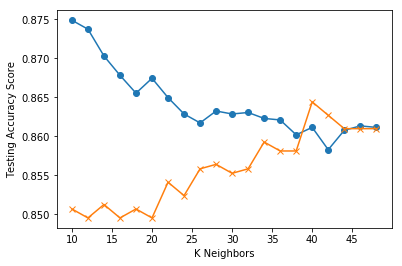

In [16]:
# Plot training and testing scores
plt.plot(range(10, 50, 2), train_scores, marker='o')
plt.plot(range(10, 50, 2), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Current best k value looks like k=44

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [21]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV model
param_grid = dict(n_neighbors=list(range(10,50,2)))

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=3)

In [22]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.867, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.844, total=   0.1s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... n_neighbors=10, score=0.840, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.850, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.870, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.838, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.855, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.842, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.847, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] .

[CV] ...................... n_neighbors=22, score=0.861, total=   0.1s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.857, total=   0.1s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.844, total=   0.1s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.857, total=   0.1s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.855, total=   0.1s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.851, total=   0.1s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.849, total=   0.1s
[CV] n_neighbors=22 ..................................................
[CV] .

[CV] ...................... n_neighbors=32, score=0.853, total=   0.1s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.857, total=   0.1s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.857, total=   0.1s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.846, total=   0.1s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.870, total=   0.1s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.855, total=   0.1s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.842, total=   0.1s
[CV] n_neighbors=34 ..................................................
[CV] .

[CV] ...................... n_neighbors=44, score=0.866, total=   0.1s
[CV] n_neighbors=44 ..................................................
[CV] ...................... n_neighbors=44, score=0.853, total=   0.1s
[CV] n_neighbors=46 ..................................................
[CV] ...................... n_neighbors=46, score=0.865, total=   0.1s
[CV] n_neighbors=46 ..................................................
[CV] ...................... n_neighbors=46, score=0.853, total=   0.1s
[CV] n_neighbors=46 ..................................................
[CV] ...................... n_neighbors=46, score=0.846, total=   0.1s
[CV] n_neighbors=46 ..................................................
[CV] ...................... n_neighbors=46, score=0.874, total=   0.1s
[CV] n_neighbors=46 ..................................................
[CV] ...................... n_neighbors=46, score=0.861, total=   0.1s
[CV] n_neighbors=46 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=48, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28,
                                         30, 32, 34, 36, 38, 40, 42, 44, 46,
                                         48]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [23]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 42}
0.8561892046538242


# Predict
Predict with new parameters

In [24]:
# Initialize classifier
knn = KNeighborsClassifier(n_neighbors=42)

# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=42, p=2,
                     weights='uniform')

In [27]:
# Predict on test set
df = pd.DataFrame({'Actual':y_test, 'Predicted':knn.predict(X_test_scaled)})
df.head(10)

,Actual,Predicted
6627,CANDIDATE,CONFIRMED
5358,CANDIDATE,CANDIDATE
5099,CANDIDATE,CANDIDATE
1490,CANDIDATE,CONFIRMED
5028,FALSE POSITIVE,FALSE POSITIVE
631,CONFIRMED,CONFIRMED
3587,FALSE POSITIVE,FALSE POSITIVE
2037,CANDIDATE,CANDIDATE
4697,FALSE POSITIVE,FALSE POSITIVE
5687,FALSE POSITIVE,FALSE POSITIVE


In [26]:
# Score the model
knn.score(X_test_scaled, y_test)

0.8627002288329519